In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import pandas as pd
df = pd.read_csv("C:/Users/LENOVO/Documents/DATA SCIENCE/DataSets/netflix_titles_2021.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
df.shape

(8807, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [7]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.dropna(subset=['date_added','cast','director'],inplace=True)
df.shape

(5700, 12)

In [10]:
df.fillna('missing',inplace=True)
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [11]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",missing,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",missing,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",missing,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...


In [12]:
df['year_added'] = df['date_added'].apply(lambda x:x.split(',')[1]).astype('int')
df['month_added'] = df['date_added'].apply(lambda x:x.split(',')[0].split()[0])
df.drop(columns=['date_added'],inplace=True)
df.head(3)

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,year_added,month_added
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",missing,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,September
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",missing,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021,September
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",missing,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,September


In [16]:
del_release = df[df['release_year']>df['year_added']].shape[0]
del_release

3

In [17]:
df2 = df[df['year_added']>=df['release_year']]
df2.shape

(5697, 13)

In [18]:
genres = df2['listed_in'].apply(lambda x:x.split(','))
df['genre 1'] = genres.str.get(0)
df['genre 2'] = genres.str.get(1)
df['genre 3'] = genres.str.get(2)
df.head(3)

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,year_added,month_added,genre 1,genre 2,genre 3
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",missing,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,September,Crime TV Shows,International TV Shows,TV Action & Adventure
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",missing,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021,September,TV Dramas,TV Horror,TV Mysteries
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",missing,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,September,Children & Family Movies,NaN,NaN


In [25]:
df.drop(columns=('listed_in'),inplace=True)
df.head(3)

KeyError: "['listed_in'] not found in axis"

AttributeError: module 'matplotlib' has no attribute 'show'

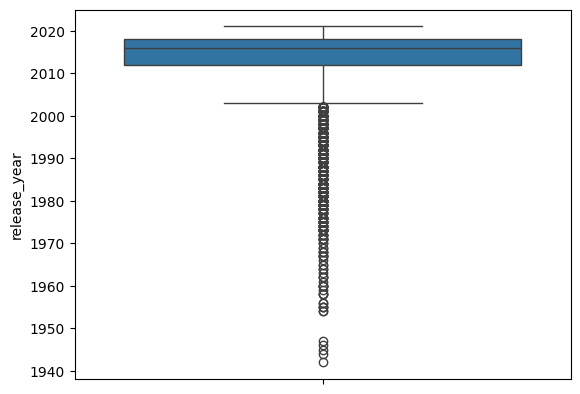

In [23]:
import seaborn as sns
import matplotlib as plt
sns.boxplot(y=df2['release_year'],data=df2)
plt.show()

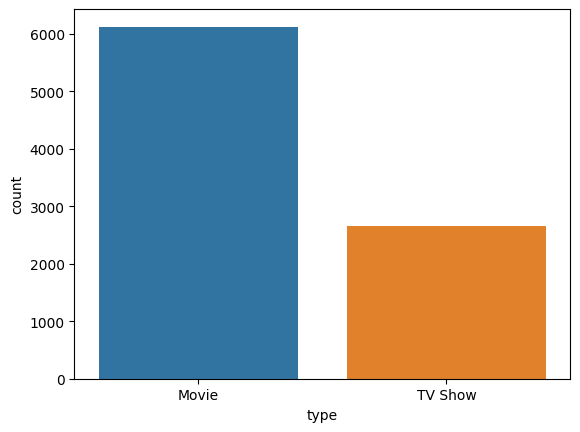

In [18]:
sns.countplot(x=df2['type'],data=df2)
plt.show()

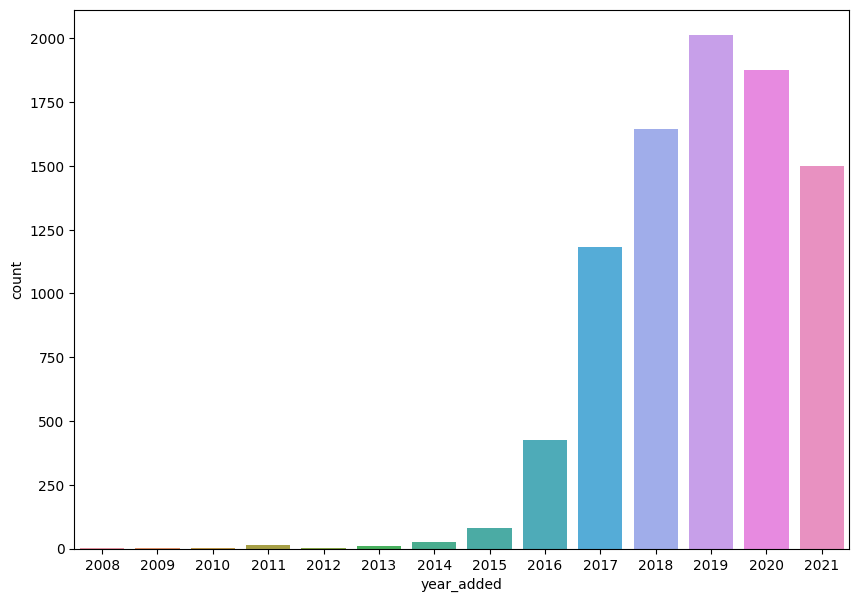

In [19]:
plt.figure(figsize=(10,7))
sns.countplot(x=df2['year_added'],data=df2)
plt.show()


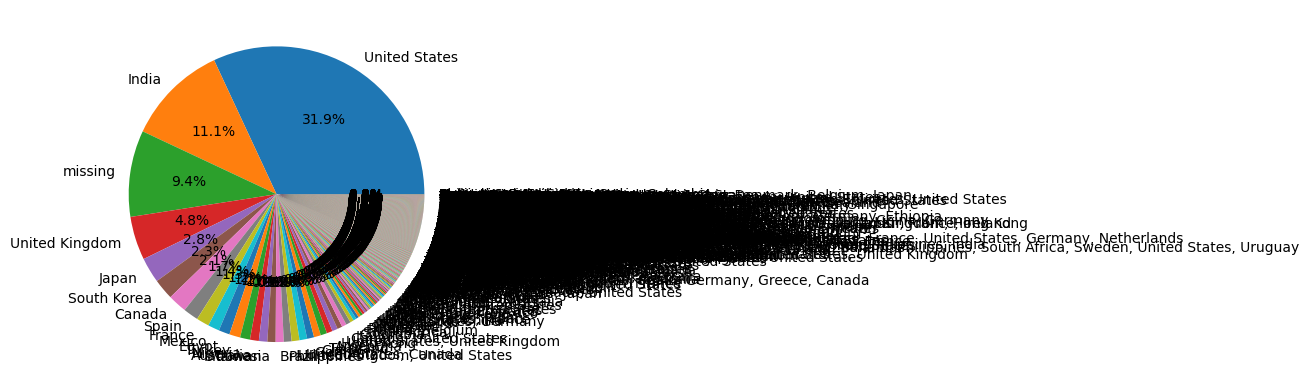

In [20]:
country_counts = df2['country'].value_counts()
plt.pie(x=country_counts,labels=country_counts.index,autopct='%.1f%%')
plt.show()

In [21]:
#this indicate that maximum movies is released in US INDIA UK

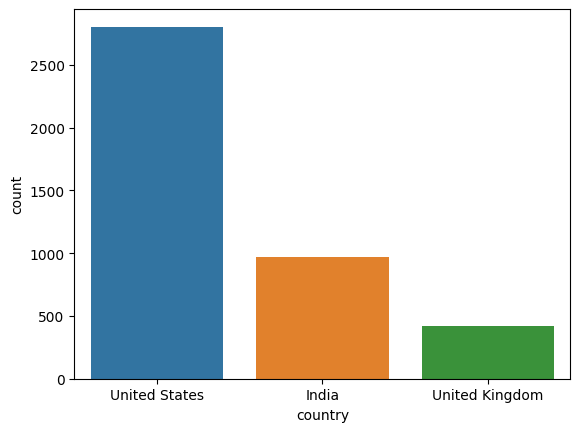

In [22]:
d = df2[(df2['country']=='United States')|(df2['country']=='India')|(df2['country']=='United Kingdom')]
sns.countplot(x='country',data=d)
plt.show()

In [23]:
counts = df2['director'].value_counts()
counts

director
missing                           2610
Rajiv Chilaka                       19
Raúl Campos, Jan Suter              18
Marcus Raboy                        16
Suhas Kadav                         16
                                  ... 
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Eric Bross                           1
Will Eisenberg                       1
Mozez Singh                          1
Name: count, Length: 4524, dtype: int64

In [24]:
cnts1 = df2['director'].value_counts()[1:4]
cnts2 = df2['director'].value_counts()[-3:]
cnts3 = pd.concat([cnts1,cnts2])
cnts3

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Eric Bross                 1
Will Eisenberg             1
Mozez Singh                1
Name: count, dtype: int64

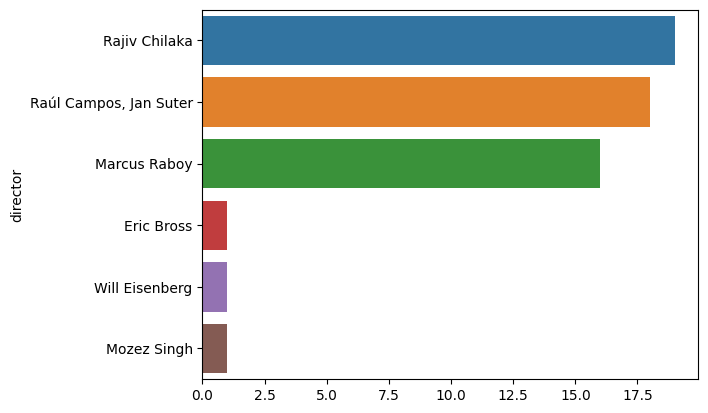

In [25]:
sns.barplot(x=cnts3.values,y=cnts3.index,data=df2)
plt.show()